In [1]:
!pip install pandas scikit-learn xgboost matplotlib seaborn

In [3]:
from google.colab import files
uploaded = files.upload()


Saving data_train.csv to data_train.csv


In [4]:
import pandas as pd

# Tải file từ local nếu cần
# from google.colab import files
# uploaded = files.upload()

# Đọc file dữ liệu
df = pd.read_csv('data_train.csv')  # đổi tên file nếu khác

# Kiểm tra dữ liệu
print(df.shape)
df.head()


(1310, 10)


,STT,c',L,gamma,h,u,phi',beta,FS,Nhan
0,1,78.0,35.0,19.1,8.2,2.8,33.5,16.7,4.25,An toàn
1,2,55.0,48.0,20.3,12.1,7.5,29.2,22.5,2.11,An toàn
2,3,28.0,62.0,21.5,15.5,18.9,24.1,31.8,0.95,Co dau hieu
3,4,12.0,85.0,22.2,18.8,32.5,17.8,39.5,0.48,Nguy co cao
4,5,63.0,29.0,18.5,6.5,1.5,35.8,12.3,6.12,An toàn


In [7]:
import pandas as pd

df = pd.read_csv("data_train.csv")  # thay bằng tên file bạn tải
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STT     1310 non-null   int64  
 1   c'      1310 non-null   float64
 2   L       1310 non-null   float64
 3   gamma   1310 non-null   float64
 4   h       1310 non-null   float64
 5   u       1310 non-null   float64
 6   phi'    1310 non-null   float64
 7   beta    1310 non-null   float64
 8   FS      1310 non-null   float64
 9   Nhan    1310 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 102.5+ KB


,STT,c',L,gamma,h,u,phi',beta,FS,Nhan
0,1,78.0,35.0,19.1,8.2,2.8,33.5,16.7,4.25,An toàn
1,2,55.0,48.0,20.3,12.1,7.5,29.2,22.5,2.11,An toàn
2,3,28.0,62.0,21.5,15.5,18.9,24.1,31.8,0.95,Co dau hieu
3,4,12.0,85.0,22.2,18.8,32.5,17.8,39.5,0.48,Nguy co cao
4,5,63.0,29.0,18.5,6.5,1.5,35.8,12.3,6.12,An toàn


In [8]:
# Xóa cột không cần thiết nếu có
if 'STT' in df.columns:
    df = df.drop(columns=['STT'])

# Xử lý giá trị thiếu (nếu có)
df = df.dropna()

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Nhan_encoded'] = le.fit_transform(df['Nhan'])

In [10]:
X = df[['c\'', 'L', 'gamma', 'h', 'u', 'phi\'', 'beta']]
y = df['Nhan_encoded']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:29:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

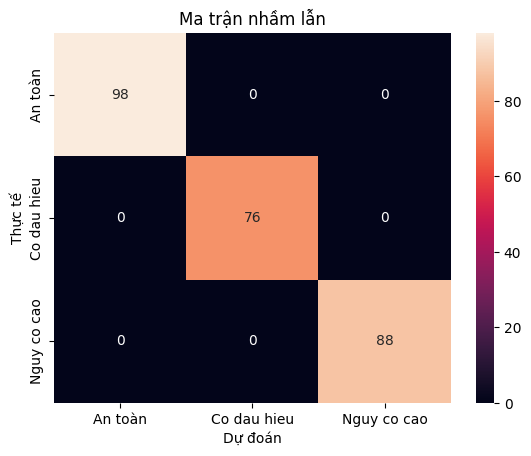

              precision    recall  f1-score   support

     An toàn       1.00      1.00      1.00        98
 Co dau hieu       1.00      1.00      1.00        76
 Nguy co cao       1.00      1.00      1.00        88

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Ma trận nhầm lẫn")
plt.show()

# Báo cáo chi tiết
print(classification_report(y_test, y_pred, target_names=le.classes_))

In [15]:
# Ví dụ 1 mẫu đầu vào
sample = pd.DataFrame([{
    "c'": 30,
    "L": 60,
    "gamma": 19.5,
    "h": 10.0,
    "u": 5.0,
    "phi'": 25,
    "beta": 30
}])

# Chuẩn hóa mẫu
sample_scaled = scaler.transform(sample)

# Dự đoán
pred = model.predict(sample_scaled)
print("Dự đoán mức độ sạt lở:", le.inverse_transform(pred)[0])


Dự đoán mức độ sạt lở: Co dau hieu


In [16]:
import joblib

joblib.dump(model, "model_satlo.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']

🎯 Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


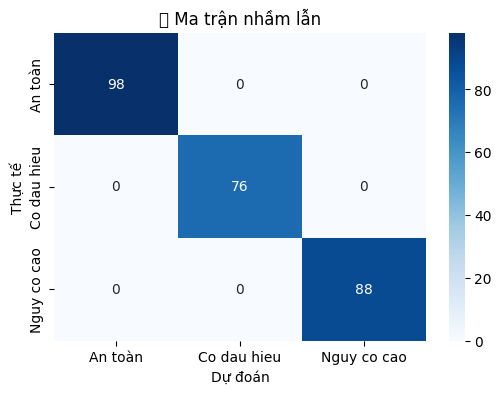

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🧾 Báo cáo chi tiết:

              precision    recall  f1-score   support

     An toàn       1.00      1.00      1.00        98
 Co dau hieu       1.00      1.00      1.00        76
 Nguy co cao       1.00      1.00      1.00        88

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262


🧪 Dự đoán cho các mẫu kiểm tra:
  👉 Mẫu 1: An toàn
  👉 Mẫu 2: Co dau hieu
  👉 Mẫu 3: Nguy co cao


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:32:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.


🔁 Cross-validation accuracy (5-fold): [0.99618321 1.         1.         0.99618321 1.        ]
📊 Mean accuracy: 0.9985


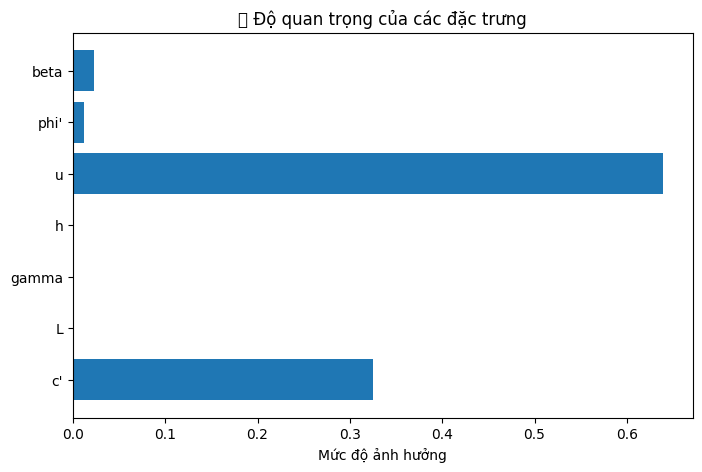

In [17]:
# ===== ĐÁNH GIÁ 1: Accuracy =====
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("🎯 Accuracy:", round(accuracy, 4))

# ===== ĐÁNH GIÁ 2: Ma trận nhầm lẫn =====
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("📊 Ma trận nhầm lẫn")
plt.show()

# ===== ĐÁNH GIÁ 3: Classification Report =====
from sklearn.metrics import classification_report

print("🧾 Báo cáo chi tiết:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ===== ĐÁNH GIÁ 4: Dự đoán thủ công với các mẫu đại diện =====
test_cases = [
    {"c'": 70, "L": 30, "gamma": 18.5, "h": 5.0, "u": 0.5, "phi'": 36, "beta": 12},  # An toàn
    {"c'": 35, "L": 60, "gamma": 19.5, "h": 12.0, "u": 6.0, "phi'": 25, "beta": 28}, # Co dau hieu
    {"c'": 10, "L": 90, "gamma": 22.0, "h": 20.0, "u": 30.0, "phi'": 15, "beta": 42}  # Nguy co cao
]

sample_df = pd.DataFrame(test_cases)
sample_scaled = scaler.transform(sample_df)
preds = model.predict(sample_scaled)

print("\n🧪 Dự đoán cho các mẫu kiểm tra:")
for i, pred in enumerate(preds):
    print(f"  👉 Mẫu {i+1}: {le.inverse_transform([pred])[0]}")

# ===== ĐÁNH GIÁ 5: Cross-validation (5-Fold CV) =====
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='accuracy')
print("\n🔁 Cross-validation accuracy (5-fold):", cv_scores)
print("📊 Mean accuracy:", round(cv_scores.mean(), 4))

# ===== ĐÁNH GIÁ 6: Feature Importance =====
plt.figure(figsize=(8, 5))
plt.barh(X.columns, model.feature_importances_)
plt.title("📌 Độ quan trọng của các đặc trưng")
plt.xlabel("Mức độ ảnh hưởng")
plt.show()


In [18]:
from google.colab import files

# Tải từng file
files.download("model_satlo.pkl")
files.download("scaler.pkl")
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>